# XOR_NN

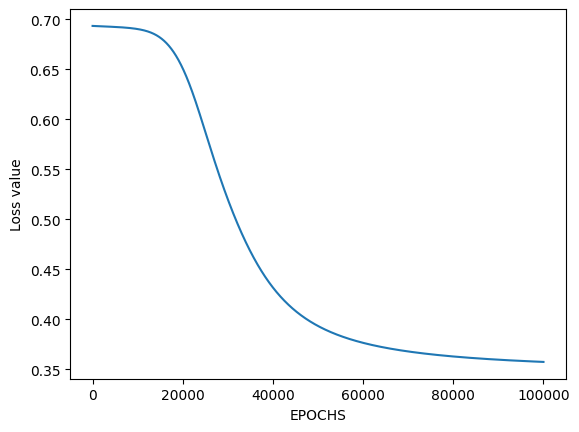

Final Output:  [[0.98301795 0.5072437  0.00925894 0.49857491]]
Prediction:  [[1. 1. 0. 0.]]


In [9]:
import numpy as np
from matplotlib import pyplot as plt

def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
	W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
	W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
	b1 = np.zeros((neuronsInHiddenLayers, 1))
	b2 = np.zeros((outputFeatures, 1))

	parameters = {"W1" : W1, "b1": b1,
				"W2" : W2, "b2": b2}
	return parameters

# Forward Propagation
def forwardPropagation(X, Y, parameters):
	m = X.shape[1]
	W1 = parameters["W1"]
	W2 = parameters["W2"]
	b1 = parameters["b1"]
	b2 = parameters["b2"]

	net1 = np.dot(W1, X) + b1
	A1 = 1 / (1 + np.exp(-net1))
	net2 = np.dot(W2, A1) + b2
	A2 = 1 / (1 + np.exp(-net2))

	cache = (net1, A1, W1, b1, net2, A2, W2, b2)
	logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
	cost = -np.sum(logprobs) / m
	return cost, cache, A2

# Backward Propagation
def backwardPropagation(X, Y, cache):
	m = X.shape[1]
	(net1, A1, W1, b1, net2, A2, W2, b2) = cache

	dnet2 = A2 - Y
	dW2 = np.dot(dnet2, A1.T) / m
	db2 = np.sum(dnet2, axis = 1, keepdims = True)

	dA1 = np.dot(W2.T, dnet2)
	dnet1 = np.multiply(dA1, A1 * (1- A1))
	dW1 = np.dot(dnet1, X.T) / m
	db1 = np.sum(dnet1, axis = 1, keepdims = True) / m

	gradients = {"dZ2": dnet2, "dW2": dW2, "db2": db2,
				"dZ1": dnet1, "dW1": dW1, "db1": db1}
	return gradients

# Updating the weights based on the negative gradients
def updateParameters(parameters, gradients, learningRate):
	parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
	parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
	parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
	parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
	return parameters

# Model to learn the XOR truth table
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # XOR input
Y = np.array([[0, 1, 1, 0]]) # XOR output

# Define model parameters
neuronsInHiddenLayers = 2 # number of hidden layer neurons (2)
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

for i in range(epoch):
	losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
	gradients = backwardPropagation(X, Y, cache)
	parameters = updateParameters(parameters, gradients, learningRate)

# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

# Testing
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # XOR input
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
print("Final Output: ",A2)
print("Prediction: ",prediction)
